In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
#import mplcursors
%matplotlib inline
import seaborn as sns
sns.set_theme()
pd.set_option('display.max_columns', None)

In [2]:
#dataset final
import os
os.chdir("C:/Users/antho/Projet_NBA")
df = pd.read_pickle('Nettoyage_données_NBA_DataViz.pkl')

In [41]:
pd.DataFrame({'caractéristiques' : ['Reggie Bullock','Mavericks de Dallas','Warriors de Golden State',0.514,'GS - DAL','Arrière',32,'2ème quart-temps', '2:34','Jump Shot', '3_pts','55 - 51']}, 
             index = ['player_name','equipe_joueur','equipe_adverse','%PCT equipe_adverse','match','position','age','period','temps_restant','action_type','shot_type', 'score au moment du tir'])

,caractéristiques
player_name,Reggie Bullock
equipe_joueur,Mavericks de Dallas
equipe_adverse,Warriors de Golden State
%PCT equipe_adverse,0.514
match,GS - DAL
position,Arrière
age,32
period,2ème quart-temps
temps_restant,2:34
action_type,Jump Shot


In [ ]:
df['x_location']

(-50.0, 425.0)

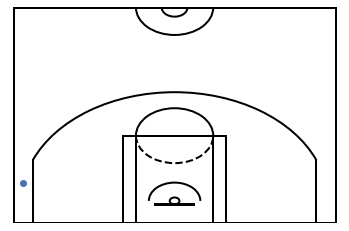

In [24]:
draw_court(color='black',outer_lines=True)
plt.scatter(x = -235,y = 40)
plt.xlim(-260,260)
plt.ylim(-50, 425)

In [29]:
df[(df['x_location'] == -235) & (df['y_location'] == 40)]

,player_name,period,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,x_location,y_location,shot_made_flag,position,year_game_date,age,w_pct_adverse,classement_adversaire,domicile,angle_tir,temps_restant,score_margin,mène,zone_pct
36554,Tim Duncan,2,Fadeaway Jump Shot,3,Left Corner 3,Left Side(L),24+ ft.,7.0104,-235,40,1,4,2004,28,0.659,5.0,1,80.340103,0,9,1,0.625000
61738,Ray Allen,3,Jump Shot,3,Left Corner 3,Left Side(L),24+ ft.,7.0104,-235,40,0,2,2006,30,0.659,4.0,1,80.340103,350,-4,-1,0.435265


In [4]:
#Création du court

from matplotlib.patches import Circle, Rectangle, Arc
import matplotlib as mpl
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
        # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(-50, 470)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('white')
    # General plot parameters
    mpl.rcParams['font.family'] = 'Avenir'
    mpl.rcParams['font.size'] = 18
    mpl.rcParams['axes.linewidth'] = 2

    return ax

In [5]:
## ADDITION D'UN SECOND MENU CORRESPONDANT AUX ANNEES:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from matplotlib.colors import ListedColormap
from  matplotlib.colors import LinearSegmentedColormap
# Load data into a pandas dataframe
#df = pd.read_csv('https://raw.githubusercontent.com/morenoh149/Python-Practice-Problems/master/Shot_Chart.csv')

# Create a dropdown menu with player names
player_dropdown = widgets.Dropdown(
    options=['All'] + list(df['player_name'].unique()),
    value='All',
    description='Select Player:'
)
"""
# Create a dropdown menu with years
year_dropdown = widgets.Dropdown(
    options=df['Year'].unique(),
    value=df['Year'].iloc[0],
    description='Select Year:'
)
"""
# Create a dropdown menu with years
years = list(df['year_game_date'].unique())
years.insert(0, 'All')
year_dropdown = widgets.Dropdown(
    options=years,
    value='All',
    description='Select Year:'
)

# Function to calculate shot success rate
"""
def shot_success(df, player_name, year):
    player_data = df[(df['Player Name'] == player_name) & (df['Year'] == year)]
    total_shots = len(player_data)
    successful_shots = len(player_data[player_data['Shot Made Flag'] == 1])
    success_rate = successful_shots / total_shots
    return success_rate
"""
def shot_success(df, player_name, year):
    player_data = df[(df['player_name'] == player_name) & (df['year_game_date'] == year)]
    total_shots = len(player_data)
    if total_shots == 0:
        return 0.0
    successful_shots = len(player_data[player_data['shot_made_flag'] == 1])
    success_rate = successful_shots / total_shots
    return success_rate

# Create a function to update the plot based on the selected player and year
def update_plot(player_name, year):
    if player_name == 'All' and year == 'All':
        player_data = df
    elif player_name == 'All':
        player_data = df[df['year_game_date'] == year]
    elif year == 'All':
        player_data = df[df['player_name'] == player_name]
    else:
        player_data = df[(df['player_name'] == player_name) & (df['year_game_date'] == year)]

    gridsize = 50
    plt.figure(figsize=(10,10))
    shot_df = player_data
#    cmap = ListedColormap(["red", "lawngreen"])
    cmap=LinearSegmentedColormap.from_list('rg',["red", "yellow","lawngreen"], N=256) 
 #   cmap = matplotlib.colormaps.get_cmap('cool')

    ######################## 2PTS #########################
    x_2pts = shot_df['x_location'][(shot_df['shot_type'] == '2PT Field Goal')]
    y_2pts = shot_df['y_location'][(shot_df['shot_type'] == '2PT Field Goal')]
    x_2pts_made = shot_df['x_location'][(shot_df['shot_made_flag']==1) & (shot_df['shot_type'] == '2PT Field Goal')]
    y_2pts_made = shot_df['y_location'][(shot_df['shot_made_flag']==1) & (shot_df['shot_type'] == '2PT Field Goal')]

    ##### Nombre de shots pris et réussis pour chaque hexagone
    hexa_shot2pts = plt.hexbin(x_2pts, y_2pts, gridsize=gridsize, extent=(-250,250,425,-50),cmap=cmap);
    plt.close()
    hexa_made2pts = plt.hexbin(x_2pts_made, y_2pts_made, gridsize=gridsize, extent=(-250,250,425,-50),cmap=cmap);
    plt.close()

    #### Calcul du pourcentage de réussite à 2PTS
    Shot_2pts_made_percentage = hexa_made2pts.get_array() / hexa_shot2pts.get_array()
    Shot_2pts_made_percentage[np.isnan(Shot_2pts_made_percentage)] = 0 #transforme les Nan en 0
    OFFSETS_2pts = hexa_shot2pts.get_offsets()
    #######################################################

    ######################## 3PTS #########################
    x_3pts = shot_df['x_location'][(shot_df['shot_type'] == '3PT Field Goal')]
    y_3pts = shot_df['y_location'][(shot_df['shot_type'] == '3PT Field Goal')]
    x_3pts_made = shot_df['x_location'][(shot_df['shot_made_flag']==1) & (shot_df['shot_type'] == '3PT Field Goal')]
    y_3pts_made = shot_df['y_location'][(shot_df['shot_made_flag']==1) & (shot_df['shot_type'] == '3PT Field Goal')]
    
    ##### Nombre de shots pris et réussis pour chaque hexagone
    hexa_shot3pts = plt.hexbin(x_3pts, y_3pts, gridsize=gridsize, extent=(-250,250,425,-50),cmap=cmap);
    plt.close()
    hexa_made3pts = plt.hexbin(x_3pts_made, y_3pts_made, gridsize=gridsize, extent=(-250,250,425,-50),cmap=cmap);
    plt.close()

    #### Calcul du pourcentage de réussite à 3PTS
    Shot_3pts_made_percentage = hexa_made3pts.get_array() / hexa_shot3pts.get_array()
    Shot_3pts_made_percentage[np.isnan(Shot_3pts_made_percentage)] = 0 #transforme les Nan en 0
    OFFSETS_3pts = hexa_shot3pts.get_offsets()
    #######################################################

    ###### Création Figure 2PTS
    fig, axs = plt.subplots(1, 2,figsize=(20,6))

    for i in np.arange(len(hexa_shot2pts.get_array())):
        if hexa_shot2pts.get_array()[i] > 240/gridsize: 
            hexa_shot2pts.get_array()[i] = 240/gridsize

    sc = axs[0].scatter(OFFSETS_2pts[:, 0], OFFSETS_2pts[:, 1], c = Shot_2pts_made_percentage, s = hexa_shot2pts.get_array()*10,cmap=cmap, marker='h')

    ##### Ajout du terrain
    axs[0] = draw_court(ax = axs[0],color='black',outer_lines=True)
    axs[0].set_xlim(-260,260)
    axs[0].set_ylim(-50, 425)
    #####

    ##### Ajout colorbar 2PTS
    #ax2 = fig.add_axes([0.9, .1, 0.02, 0.8])
    cb_2pts = fig.colorbar(sc,ax = axs[0], orientation='vertical')
    cb_2pts.set_label('2PTS %',labelpad=0,fontsize = 20)
    cb_2pts.set_ticks([0.0, 0.25, 0.5, 0.75, 1.0])
    cb_2pts.set_ticklabels(['0%','25%', '50%','75%', '100%'])

    ####### Ajout de la légende 2pts
    shots_by_hex_2pts = hexa_shot2pts.get_array()
    freq_by_hex_2pts = shots_by_hex_2pts / sum(shots_by_hex_2pts)
    sizes_2pts = freq_by_hex_2pts
    sizes_2pts = sizes_2pts / max(sizes_2pts)
    max_freq_2pts = max(freq_by_hex_2pts)
    max_size_2pts = max(sizes_2pts)

    legend_2pts = axs[0].legend(*sc.legend_elements('sizes', num=6,alpha=0.5, fmt="{x:.3f}%"
                                            , func=lambda s: (s / max_size_2pts) * max_freq_2pts * 10),
                                            loc='upper left', title='Freq (%)', fontsize='small',
                                            facecolor='white',framealpha=0.5)
    #plt.gca().add_artist(legend_2pts)
    #plt.show();
    ##### Titre 2pts
    if player_name == 'All':
        axs[0].set_title('All players' +' - Réussite à 2PTS'+ ' \n Année: '+str(year),fontsize = 30)
    else:
        axs[0].set_title(shot_df['player_name'].unique()[0] +' - Réussite à 2PTS'+ ' \n Année: '+str(year),fontsize = 30)

    ###### Création Figure 3PTS

    for i in np.arange(len(hexa_shot3pts.get_array())):
        if hexa_shot3pts.get_array()[i] > 240/gridsize: 
            hexa_shot3pts.get_array()[i] = 240/gridsize

    sc1 = axs[1].scatter(OFFSETS_3pts[:, 0], OFFSETS_3pts[:, 1], c = Shot_3pts_made_percentage, s = hexa_shot3pts.get_array()*10,cmap=cmap, marker='h')

    ##### Ajout du terrain
    axs[1] = draw_court(ax = axs[1],color='black',outer_lines=True)
    axs[1].set_xlim(-260,260)
    axs[1].set_ylim(-50, 425)
    ##### Ajout colorbar 3PTS

    #ax2 = fig.add_axes([0.9, .1, 0.02, 0.8])
    cb_3pts = fig.colorbar(sc1,ax = axs[1], orientation='vertical')
    cb_3pts.set_label('3PTS %',labelpad=0,fontsize = 20)
    cb_3pts.set_ticks([0.0, 0.25, 0.5, 0.75, 1.0])
    cb_3pts.set_ticklabels(['0%','25%', '50%','75%', '100%'])
    ####### Ajout de la légende 3pts
    shots_by_hex_3pts = hexa_shot3pts.get_array()
    freq_by_hex_3pts = shots_by_hex_3pts / sum(shots_by_hex_3pts)
    sizes_3pts = freq_by_hex_3pts
    sizes_3pts = sizes_3pts / max(sizes_3pts)
    max_freq_3pts = max(freq_by_hex_3pts)
    max_size_3pts = max(sizes_3pts)

    legend_3pts = axs[1].legend(*sc1.legend_elements('sizes', num = 6,alpha=0.5, fmt="{x:.3f}%"
                                            , func=lambda s: (s / max_size_3pts) * max_freq_3pts*10),
                                            loc='upper left', title='Freq (%)', fontsize='small',
                                            facecolor='white',framealpha=0.5)
    #plt.gca().add_artist(legend_3pts)
    ##### Titre 3pts
    if player_name == 'All':
        axs[1].set_title('All players' +' - Réussite à 3PTS'+ ' \n Année: '+str(year),fontsize = 30)
    else:
        axs[1].set_title(shot_df['player_name'].unique()[0] +' - Réussite à 3PTS ' + ' \n Année: '+str(year),fontsize = 30)

    
    success_rate = shot_success(df, player_name,year)

#player_dropdown.observe(lambda event: update_plot(event.new, year_dropdown.value), names='value')
#year_dropdown.observe(lambda event: update_plot(player_dropdown.value, event.new), names='value')


#widgets.HBox([player_dropdown, year_dropdown])

# Display the player dropdown and connect it to the update_plot function
widgets.interactive(update_plot, player_name=player_dropdown, year = year_dropdown)




interactive(children=(Dropdown(description='Select Player:', options=('All', 'Tim Duncan', 'Manu Ginobili', 'T…